In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

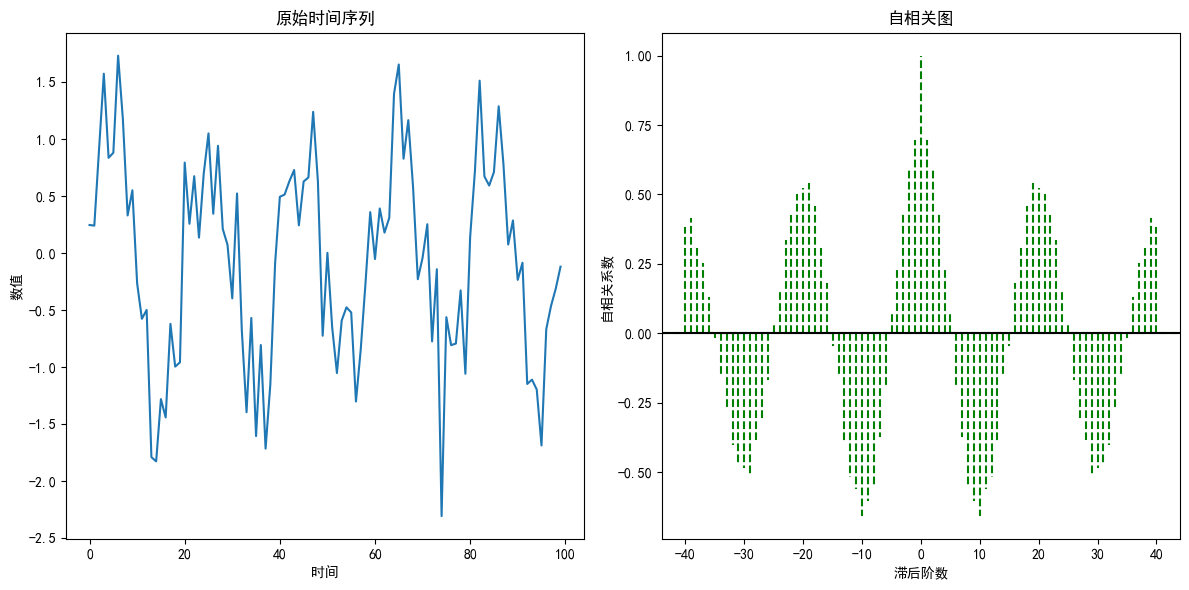

In [3]:
# 生成示例数据
np.random.seed(42)
n = 100  # 数据点数量
# 创建一个具有周期性的时间序列
t = np.linspace(0, 10*np.pi, n)
x = np.sin(t) + 0.5*np.random.randn(n)

plt.figure(figsize=(12, 6))

# 绘制原始数据
plt.subplot(121)
plt.plot(x)
plt.title('原始时间序列')
plt.xlabel('时间')
plt.ylabel('数值')

# 绘制自相关图
plt.subplot(122)

plt.acorr(
    x,                 # 输入的时间序列数据
    maxlags=40,        # 最大滞后阶数，显示从-40到40的滞后
    usevlines=True,    # 使用垂直线表示每个滞后的自相关系数
    linestyle='--',    # 自相关曲线的样式为虚线
    color='green'      # 自相关曲线和垂直线的颜色为绿色
)

plt.title('自相关图')
plt.xlabel('滞后阶数')
plt.ylabel('自相关系数')
plt.axhline(y=0, color='black', linestyle='solid')  # 添加零线
plt.tight_layout()
plt.show()

# 2、使用示例：

### 示例 1：不同 maxlags 参数的自相关图对比

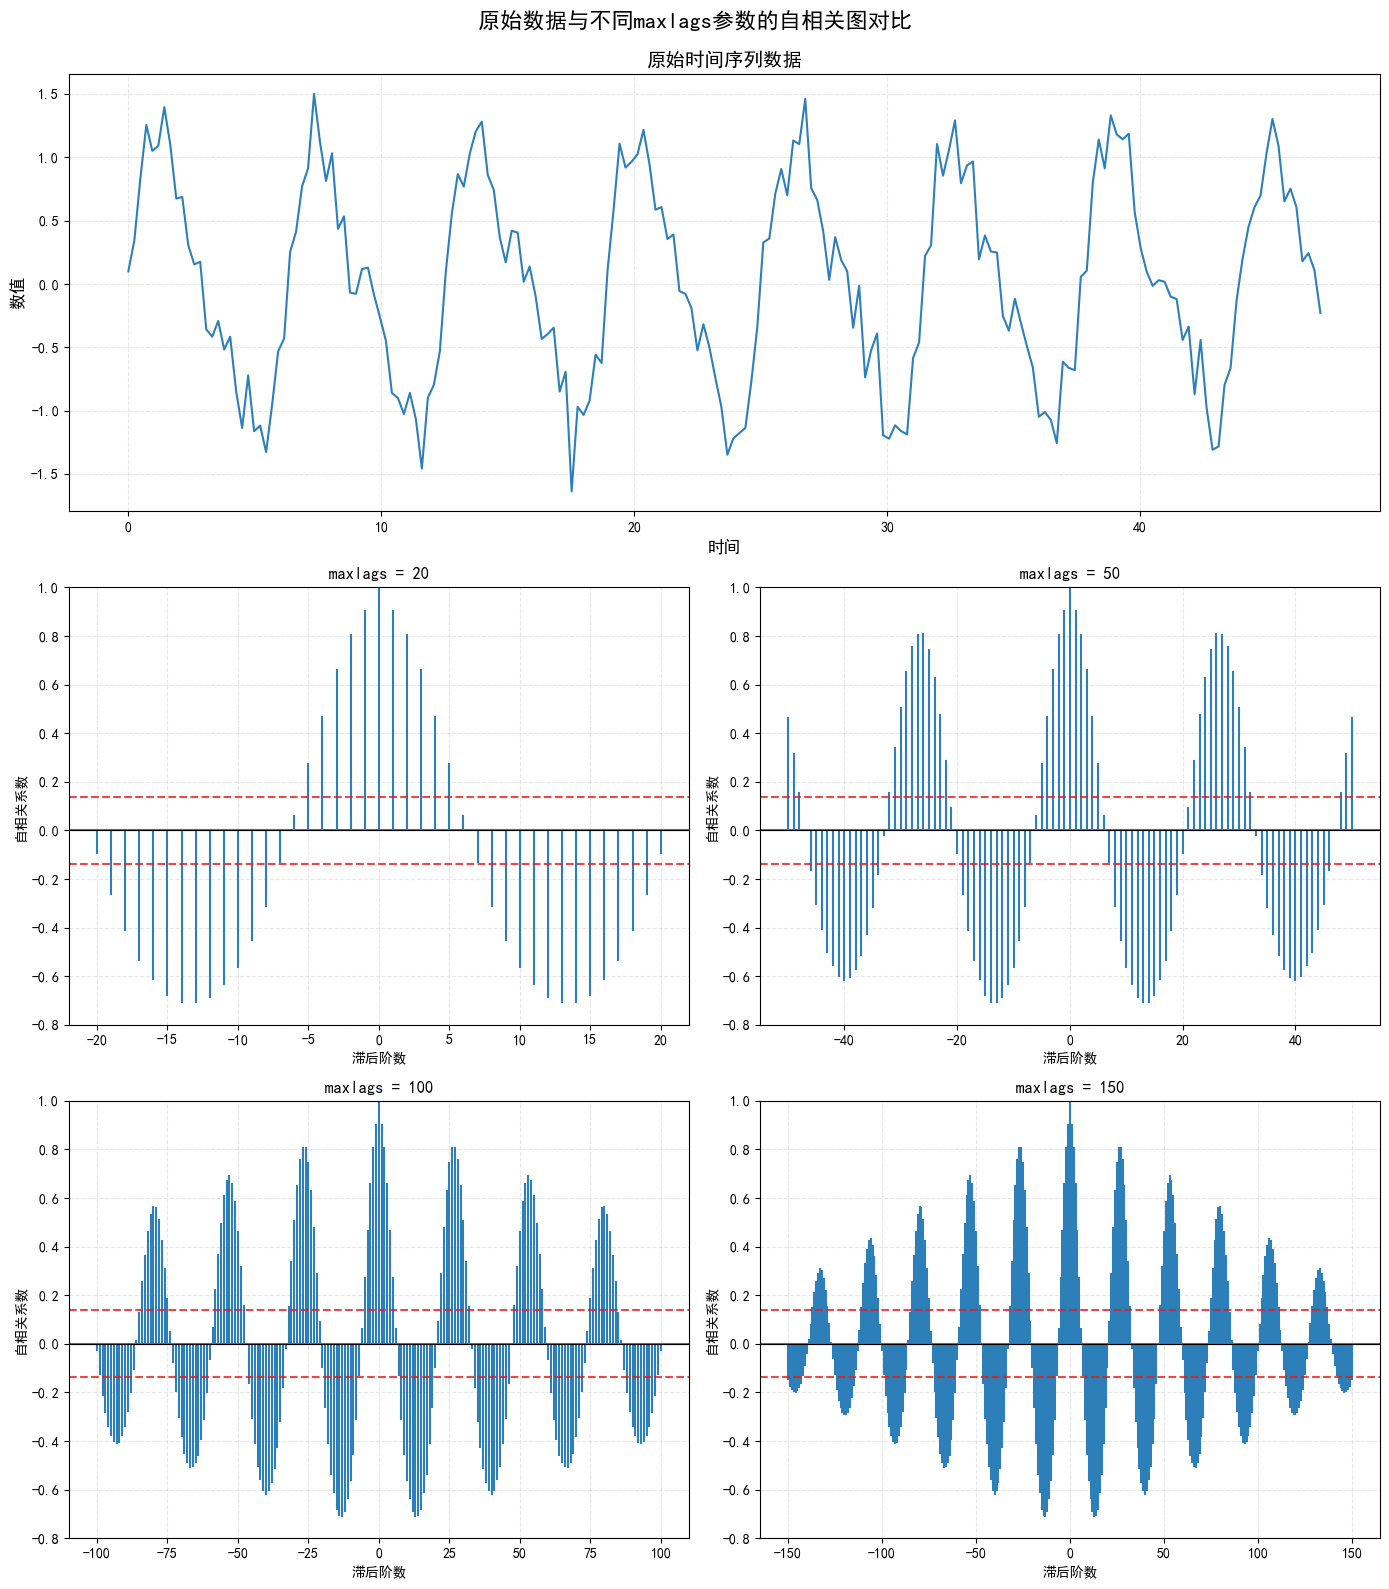

In [4]:
# 生成示例数据：具有周期性的时间序列
np.random.seed(42)  # 设置随机种子，确保结果可复现
n = 200  # 数据点数量
t = np.linspace(0, 15*np.pi, n)  # 时间轴
# 创建包含周期成分和噪声的时间序列
x = np.sin(t) + 0.3*np.sin(2*t) + 0.2*np.random.randn(n)

# 定义要比较的maxlags值
maxlags_values = [20, 50, 100, 150]

# 创建画布和子图：1行1列的原始数据图 + 2行2列的自相关对比图
fig = plt.figure(figsize=(14, 16))

# 最上方显示原始数据图表
ax_original = plt.subplot(3, 2, (1, 2))  # 跨两列显示
ax_original.plot(t, x, color='#2c7fb8')
ax_original.set_title('原始时间序列数据', fontsize=14, fontweight='bold')
ax_original.set_xlabel('时间', fontsize=12)
ax_original.set_ylabel('数值', fontsize=12)
ax_original.grid(True, alpha=0.3, linestyle='--')

# 计算95%置信区间（用于所有自相关图）
confidence_interval = 1.96 / np.sqrt(n)

# 为每个maxlags值绘制自相关图（放在原始数据图下方）
for i, maxlags in enumerate(maxlags_values):
    # 子图位置：从第3行开始，索引3到6
    ax = plt.subplot(3, 2, i + 3)
    
    # 绘制自相关图
    ax.acorr(
        x, 
        maxlags=maxlags,        # 当前循环的滞后阶数
        usevlines=True,         # 显示垂直线
        linestyle='-',          # 自相关曲线样式
        color='#2c7fb8',        # 曲线颜色
    )
    
    # 添加95%置信区间
    ax.axhline(y=confidence_interval, color='#e41a1c', linestyle='--', alpha=0.8)
    ax.axhline(y=-confidence_interval, color='#e41a1c', linestyle='--', alpha=0.8)
    
    # 添加零线
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
    
    # 设置标题和标签
    ax.set_title(f'maxlags = {maxlags}', fontsize=12, fontweight='bold')
    ax.set_xlabel('滞后阶数', fontsize=10)
    ax.set_ylabel('自相关系数', fontsize=10)
    
    # 设置y轴范围，使所有子图具有相同的尺度，便于比较
    ax.set_ylim(-0.8, 1.0)
    
    # 添加网格
    ax.grid(True, alpha=0.3, linestyle='--')


plt.tight_layout()
plt.suptitle('原始数据与不同maxlags参数的自相关图对比', fontsize=16, y=0.99)
plt.subplots_adjust(top=0.95)  # 调整顶部间距，避免标题重叠
plt.show()

### 示例 2：不同类型数据的自相关特性分析

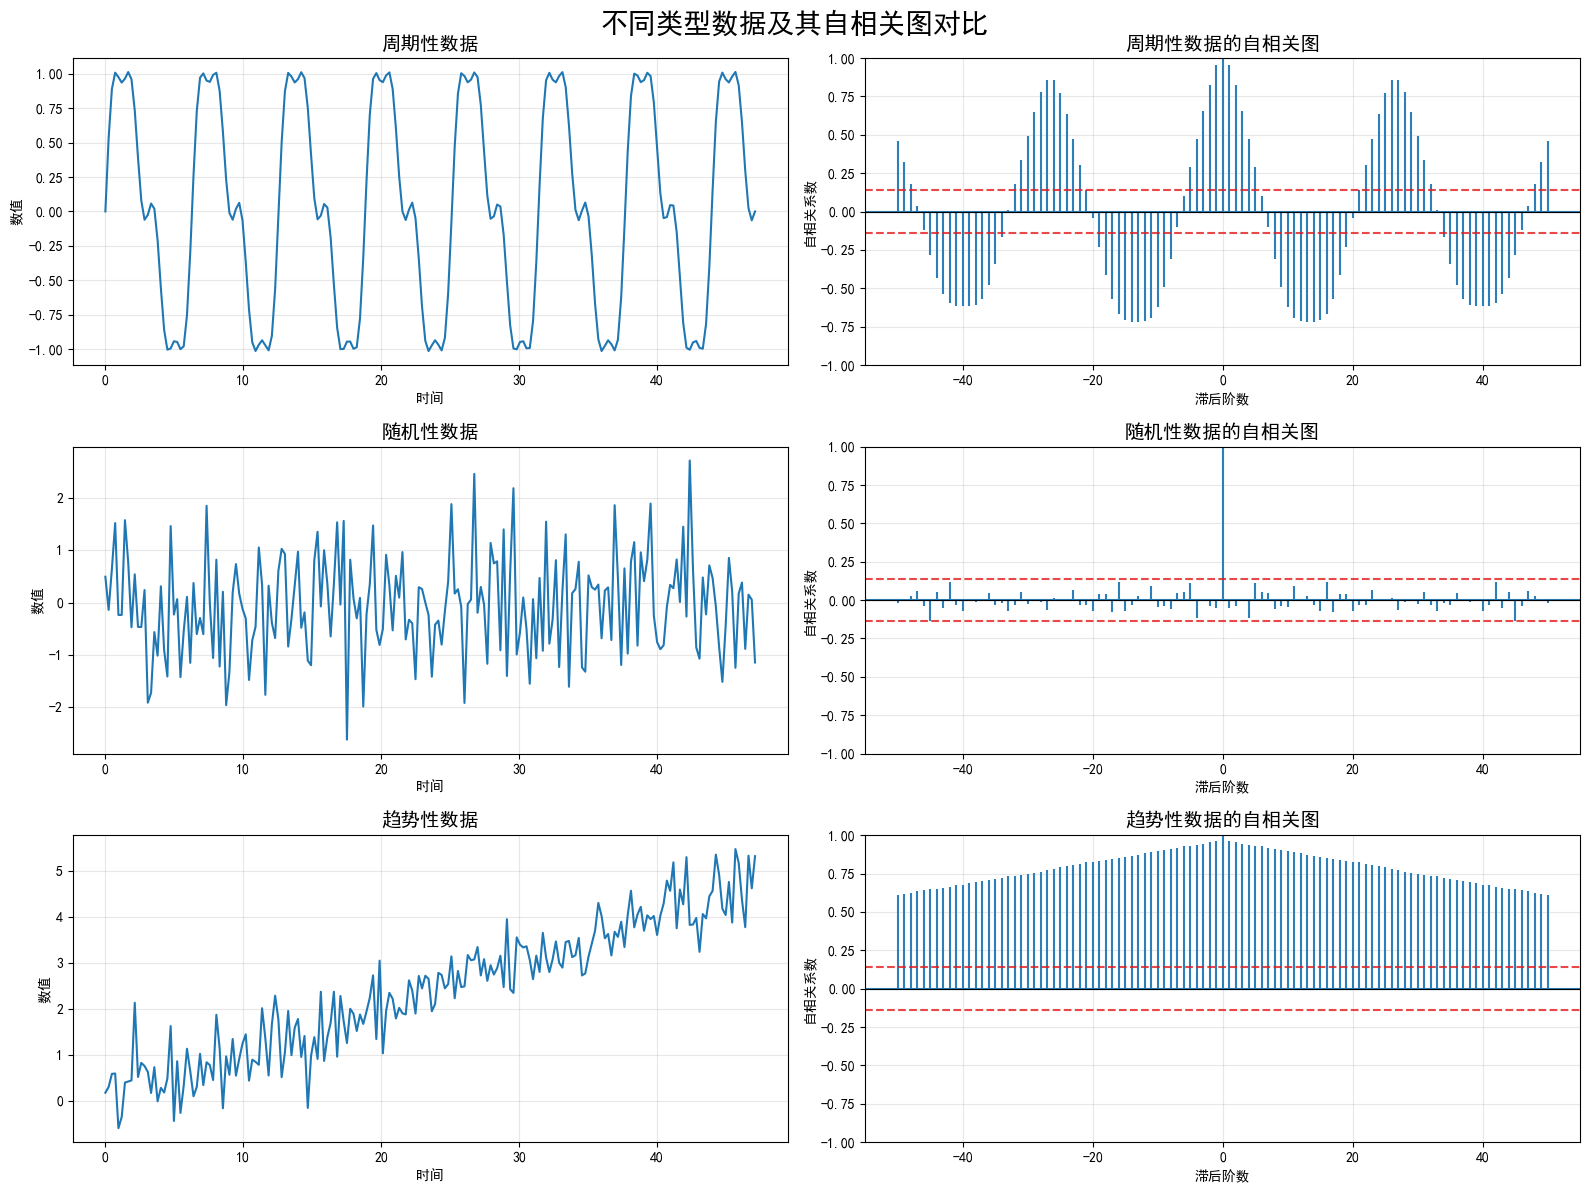

In [5]:
# 生成三种不同类型的数据
np.random.seed(42)  # 设置随机种子，确保结果可复现
n = 200  # 数据点数量
t = np.linspace(0, 15*np.pi, n)  # 时间轴

# 周期性数据
periodic_single = np.sin(t) + 0.3*np.sin(2*t) + 0.2*np.sin(4*t)

# 随机性数据
random_noise = np.random.randn(n)

# 趋势性数据
trend_data = t/10 + np.random.randn(n)*0.5  # 线性趋势+噪声

# 创建画布和子图布局
fig = plt.figure(figsize=(16, 12))
fig.suptitle('不同类型数据及其自相关图对比', fontsize=20, y=0.99)

# 定义数据和标题
data_types = [
    ('周期性数据', periodic_single),
    ('随机性数据', random_noise),
    ('趋势性数据', trend_data)
]

# 为每种数据类型绘制原始数据和自相关图
for i, (title, data) in enumerate(data_types):
    # 绘制原始数据
    ax_data = plt.subplot(len(data_types), 2, 2*i + 1)
    ax_data.plot(t, data)
    ax_data.set_title(f'{title}', fontsize=14, fontweight='bold')
    ax_data.set_xlabel('时间', fontsize=10)
    ax_data.set_ylabel('数值', fontsize=10)
    ax_data.grid(True, alpha=0.3)
    
    # 绘制自相关图
    ax_acorr = plt.subplot(len(data_types), 2, 2*i + 2)
    
    # 计算95%置信区间
    confidence_interval = 1.96 / np.sqrt(n)
    
    # 绘制自相关图
    ax_acorr.acorr(
        data, 
        maxlags=50,        # 统一设置滞后阶数，便于对比
        usevlines=True,
        linestyle='-',
        color='#2c7fb8',
    )
    
    # 添加置信区间和零线
    ax_acorr.axhline(y=confidence_interval, color='#e41a1c', linestyle='--', alpha=0.8)
    ax_acorr.axhline(y=-confidence_interval, color='#e41a1c', linestyle='--', alpha=0.8)
    ax_acorr.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
    
    ax_acorr.set_title(f'{title}的自相关图', fontsize=14, fontweight='bold')
    ax_acorr.set_xlabel('滞后阶数', fontsize=10)
    ax_acorr.set_ylabel('自相关系数', fontsize=10)
    ax_acorr.set_ylim(-1.0, 1.0)
    ax_acorr.grid(True, alpha=0.3)

# 调整布局
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # 调整顶部间距
plt.show()